## Oppgave 2 a)

[111 106 102 107 104 105 107  94 129 125 141 119 134 153 129 160 157 144
 158 155 160 169 157 153 173 173 184 206 189 184 181 189 200 216 174 186
 209 183 195 231 226 214 242 239 248 246 226 217 256 269 247 257 261 245
 270 272 276 253 252 301 280 288 288 295 283 275 317 292 303 312 308 307
 312 336 343 319 333 329 335 322 312 349 348 323 364 364 347 351 378 339
 386 359 386 396 372 397 400 397 399 399 414]


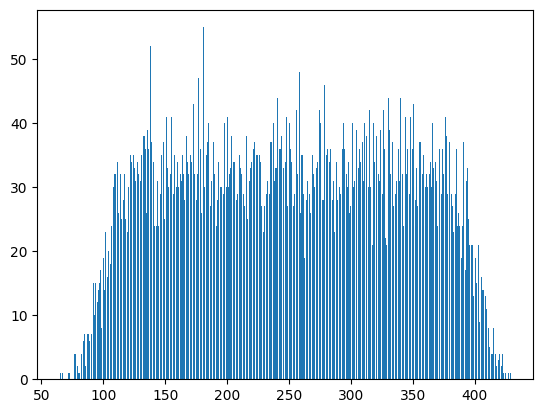

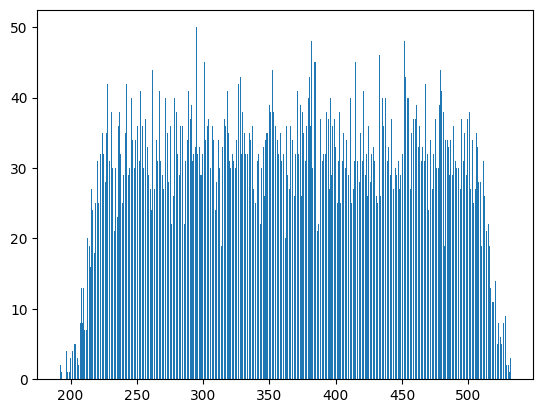

In [93]:
import numpy as np
from numba import njit
import matplotlib.pyplot as plt
kb = 1.38 * 10**-23
T = 298
beta = 1/(kb*T)

@njit
def V21(x):
    return 1/beta

@njit
def V22(x):
    return -x/beta

@njit
def walkDirection(pMinus,pPluss):
    tilfeldigVerdi = np.random.ranf()
    if tilfeldigVerdi<=pMinus:
        return -1
    elif tilfeldigVerdi >=(1-pPluss):
        return 1
    else:
        return 0


@njit
def sannsynligheter(beta,V,x):
    pPluss = 1/(1+np.exp(-beta*(V(x-1)-V(x+1)))+np.exp(-beta*(V(x)-V(x+1))))
    pMinus = 1/(1+np.exp(-beta*(V(x+1)-V(x-1)))+np.exp(-beta*(V(x)-V(x-1))))
    return pMinus, pPluss

@njit
def simulasjon(steg, beta, V, antallPartikler, mellomrom):
    posisjoner = np.arange(100,(antallPartikler)*(mellomrom+1)+100,mellomrom+1)
    for i in range(steg):
        for j in range(len(posisjoner)):
            pMinus, pPluss = sannsynligheter(beta,V,posisjoner[j])
            skritt =  walkDirection(pMinus,pPluss)
            posisjoner[j]+=skritt
    return posisjoner

def plotGjennomsnitt(steg, beta, V, antallPartikler, mellomrom, antallSimulasjoner, simulasjon):
    posisjonerArray = np.array([simulasjon(steg, beta, V, antallPartikler, mellomrom) for _ in range(antallSimulasjoner)])
    posisjonerArray = posisjonerArray.flatten()
    numberArray = np.array([0 for _ in range(200+(antallPartikler-1)*(mellomrom+1)+1)])
    for i in range(len(numberArray)):
        numberArray[i]=(posisjonerArray==i).sum()
    plt.hist(posisjonerArray,bins=500)
    plt.show()

    return

print(simulasjon(200,beta,V21,101,2))
plotGjennomsnitt(200,beta,V21,101,2,100,simulasjon)
plotGjennomsnitt(200,beta,V22,101,2,100,simulasjon)

## Oppgave 2 b)

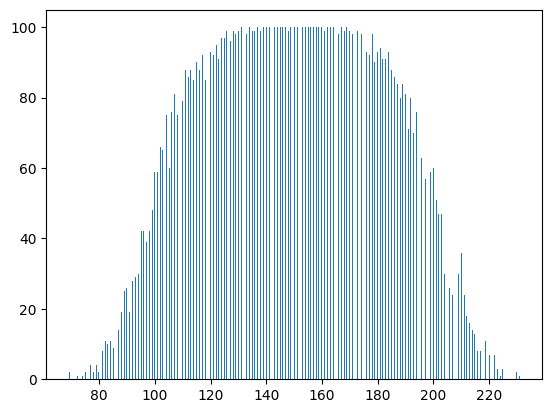

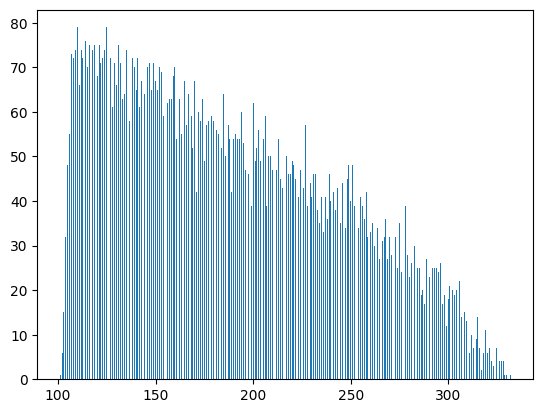

In [94]:
@njit
def simulasjonKollisjon(steg, beta, V, antallPartikler, mellomrom):
    posisjoner = np.arange(100,(antallPartikler)*(mellomrom+1)+100,mellomrom+1)
    for i in range(steg):
        for j in range(len(posisjoner)):
            pMinus, pPluss = sannsynligheter(beta,V,posisjoner[j])
            skritt =  walkDirection(pMinus,pPluss)
            if not ((posisjoner[j] + skritt) in posisjoner):
                posisjoner[j]+=skritt
    return posisjoner

plotGjennomsnitt(200,beta,V21,101,0,100,simulasjonKollisjon)
plotGjennomsnitt(200,beta,V22,101,0,100,simulasjonKollisjon)

## Oppgave 2 c)

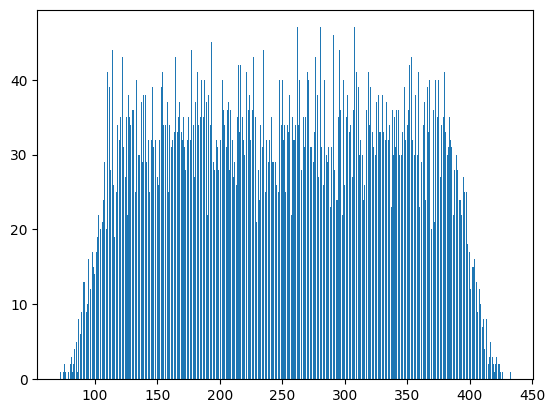

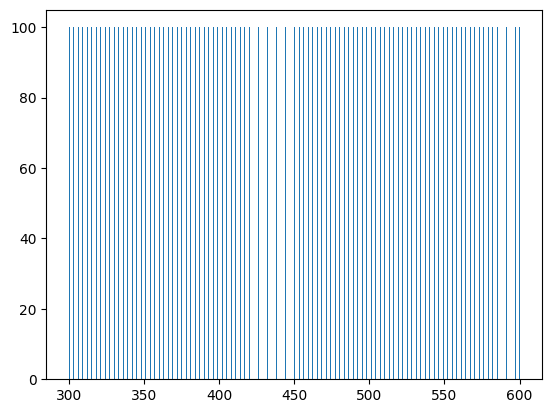

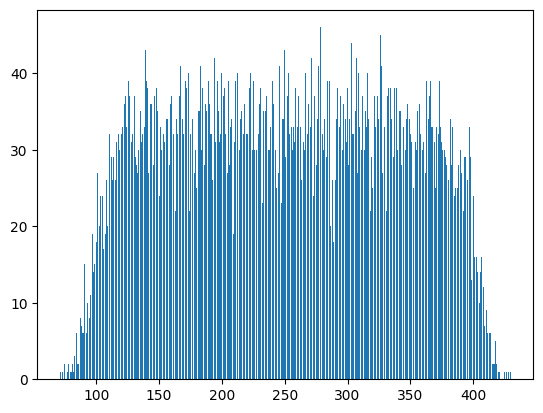

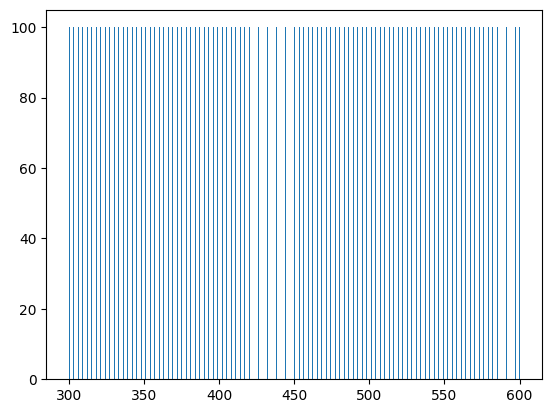

In [95]:
@njit
def V21_1000(x):
    return 1000/beta
@njit
def V22_1000(x):
    return -x*1000/beta

plotGjennomsnitt(200,beta,V21_1000,101,2,100,simulasjon)
plotGjennomsnitt(200,beta,V22_1000,101,2,100,simulasjon)
plotGjennomsnitt(200,beta,V21_1000,101,2,100,simulasjonKollisjon)
plotGjennomsnitt(200,beta,V22_1000,101,2,100,simulasjonKollisjon)

## Oppgave 3 a)

In [96]:
#import math as math


@njit
def walkDirection(pMinus,pPluss):
    tilfeldigVerdi = np.random.ranf()
    if tilfeldigVerdi<=pMinus:
        return -1
    elif tilfeldigVerdi >=(1-pPluss):
        return 1
    else:
        return 0

@njit
def V31(x,N_x,alpha,k):
    xPeriodisk = x % N_x
    if xPeriodisk < alpha*N_x:
        return k*xPeriodisk/(alpha*N_x*beta)
    else:
        xPeriodisk = xPeriodisk-N_x
        return -k*xPeriodisk/((1-alpha)*N_x*beta)


@njit
def V32(x,N_x,alpha,k):
    return 1/beta

@njit
def sannsynligheter3(beta,V,x,N_x,alpha,k,t,T_p):
    #pPluss = 1/(1+np.exp(-beta*(V(x-1,N_x,alpha,k)-V(x+1,N_x,alpha,k)))+np.exp(-beta*(V(x,N_x,alpha,k)-V(x+1,N_x,alpha,k))))
    #pMinus = 1/(1+np.exp(-beta*(V(x+1,N_x,alpha,k)-V(x-1,N_x,alpha,k)))+np.exp(-beta*(V(x,N_x,alpha,k)-V(x-1,N_x,alpha,k))))
    a = -beta * (periodiskPotensial(t,T_p,x,N_x-1,alpha,k) - periodiskPotensial(t,T_p,x+1,N_x,alpha,k))
    b = -beta * (periodiskPotensial(t,T_p,x,N_x,alpha,k) - periodiskPotensial(t,T_p,x+1,N_x,alpha,k))
    c = -beta * (periodiskPotensial(t,T_p,x+1,N_x,alpha,k) - periodiskPotensial(t,T_p,x-1,N_x,alpha,k))
    d = -beta * (periodiskPotensial(t,T_p,x,N_x,alpha,k) - periodiskPotensial(t,T_p,x-1,N_x,alpha,k))

    if a>50:
        a=50
    elif a<-50:
        a=-50
    if b>50:
        b=50
    elif b<-50:
        b=-50
    if c>50:
        c=50
    elif c<-50:
        c=-50
    if d>50:
        d=50
    elif d<-50:
        d=-50
    
    pPluss = 1.0 / (1.0 + np.exp(a) + np.exp(b))
    pMinus = 1.0 / (1.0 + np.exp(c) + np.exp(d))

    return pMinus, pPluss
@njit
def periodiskPotensial(t,T_p,x,N_x,alpha,k):
    if t % (2*T_p) < T_p:
        return V32(x,N_x,alpha,k)
    else:
        return V31(x,N_x,alpha,k)

@njit
def walkStep(N_x,alpha,k,N_p,t,T_p,X):
    nPluss = 0
    nMinus = 0
    for j in range(len(X)):
            pMinus, pPluss = sannsynligheter3(beta,periodiskPotensial,X[j],N_x,alpha,k,t,T_p)
            skritt =  walkDirection(pMinus,pPluss)

            if skritt==1:
                nPluss +=1
                if X[j]==199:
                    X[j] = 0
                else: 
                    X[j]+=skritt
            elif skritt==-1:
                nMinus +=1
                if X[j]==0:
                    X[j] = 199
                else: 
                    X[j]+=skritt

    return X, (nPluss-nMinus)/N_p


def Simulasjon3(T_p,N_x,alpha,k,N_p,cycles):
    X=np.array([[i,i,i,i,i,i] for i in range(N_p//6)]).flatten() # lager en 1200 stor array med hver siffer fra og med 0 til og med 199 6 ganger på rad
    normalisertPartikkelFlytGjennomsnittArray = np.zeros(cycles)
    for cycle in range(cycles):
        normalisertPartikkelFlytArray = np.zeros(2*T_p)
        for t in range(2*T_p):
            X, normalisertPartikkelFlyt = walkStep(N_x,alpha,k,N_p,t,T_p,X)
            normalisertPartikkelFlytArray[t] = (normalisertPartikkelFlyt)
        normalisertPartikkelFlytGjennomsnitt = normalisertPartikkelFlytArray.sum()/(2*T_p)
        normalisertPartikkelFlytGjennomsnittArray[cycle] = normalisertPartikkelFlytGjennomsnitt
    return X, normalisertPartikkelFlytGjennomsnittArray

X_10, normalisertPartikkelFlytGjennomsnittArray_08 = Simulasjon3(500,100,0.8,1000,1200,10)
X_10, normalisertPartikkelFlytGjennomsnittArray_01 = Simulasjon3(500,100,0.1,1000,1200,10)




In [ ]:
print(normalisertPartikkelFlytGjennomsnittArray_08)
print(normalisertPartikkelFlytGjennomsnittArray_01)


[-0.03069333 -0.0137825  -0.01600833 -0.017025   -0.01457917 -0.01537
 -0.0154625  -0.01512333 -0.01453417 -0.0159975 ]
[0.021435   0.00912917 0.00768667 0.00847    0.00776167 0.0068575
 0.0075425  0.0074525  0.00617167 0.00519167]


### i)
Vi får ikke-null partikkelstrømmer fordi potensial 1 har en positiv derivert for 80% av tall linjen, mot de 20%ene som er dekt av den negative deriverte. Selvom vi gjennom en hel syklus i posisjoner for potensial 1 går fra minimum til maksimum tilbake til minimum, vil vi fortsatt ha flere partikler som beveger seg til venstre for hver iterasjon da sum av skritt ikke er direkte proposjonal med magnitude av gradienten til potensialet ganget med område den dekker.

Fysiskt kan dette forklares med at vi har et område delt inn i mange seksjoner på en meter, der vi kan forskyve inndelingene litt for å få en potensialfunskjon med en dal i hver inndeling der vi starter på -0.2 meter og går til 0.8 osv gjennom område. Her vil potensialet være like maksimalt for -0.2 og 0.8 meter, og gå lineært ned mot minmium ved 0 meter. For å oppnå lavest potensiell energi vil alle partiklene bevege seg til posisjonen ved 0 meter, her kan vi se at hvis partiklene orginalt er jevnt fordelt vil flere partikler gå mot venstre enn høyre, som resulterer i en negativ gjennomsnittlig partikkelflyt.


### ii)
Vi ser at den første målingen av den gjennomsnittlige partikkelfyten er betydelig større enn alle de andre målingene som er relatvit like. Dette an forklares ved at partiklene orginalt er jevt fordelt for å så bevege seg slik at de i praksis alle er ved minimalt potensial under potensial 1, deretter byttes potensialet til potensial 2 som er konstant, og fører til tilfeldig bevegelse, på grunn av at denne tilfeldige bevegelsen skjer i en veldig begrenset tidsperiode, og at partiklene i utgangspunktet alle er veldig nær posisjon 0, forventer vi at de er betydelig nærmere posisjon 0 enn når de var jevnt fordelte ved tidspunktet der vi bytter tilbake til potensial 1. Dette gjør at vi får mindre bevegelse og derfor mindre gjennomsnittlig partikkelflyt.


### iii)
Her ser vi at den gjennomsnittlige partikkelflyten er mot høyre isteden for venstre som vi forventer da potensial 1 nå har mye større del med negativ derivert enn positiv derivert. en ting å kommentere på her er at absoluttverdien av den gjennomsnittlige partikkelflyten er mindre, dette kan tenkes foresakt av at det lave potensialet fører til en bevegelse som er nærmere tilfeldig enn et høyt potensial og at en andel partikler enten ikke kommer seg til minimumet i potensial i løpet av T_p eller at de tilfeldigvis går så mye "feil vei" at de ender opp i den andre andelen av potensialet som har derviert med betydelig større magnitude.

Ideen om at flere partikler ikke når minimumet forsterkes av den gradvise reduksjonen av partikkelflyt som vi kan observere gjennom syklusene, dette peker til at partiklene i mindre grad var konsentrert rundt minimumet ved endringen fra potensial 2 til 1 for hver iterasjon, og er forskjellig fra hva vi observerer ved alpha lik 0.8.


Oppgave 3 b)